In [1]:
import pandas as pd
import geopandas
from plotnine import *
import seaborn as sns


In [2]:
df = pd.read_csv("data/train_sample_clean_prepared.csv")
df.shape

(548780, 11)

In [3]:
df.head()

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
0,10.9,2011,19,5,10,-73.972253,40.746463,-73.955485,40.764362,5,2.44
1,37.5,2014,26,3,22,-74.008180,40.707032,-73.928460,40.853647,1,17.63
2,5.7,2012,27,6,18,-73.994439,40.734462,-74.007644,40.740937,1,1.33
3,6.5,2013,39,3,21,-73.996230,40.753520,-73.987592,40.770522,1,2.03
4,5.3,2009,41,7,22,-73.989362,40.726397,-73.997931,40.719469,1,1.06


In [4]:
df.dtypes

fare_amount          float64
pickup_year            int64
pickup_week            int64
pickup_day_week        int64
pickup_hour            int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dist_points_km       float64
dtype: object

In [5]:
df[df.dist_points_km.isnull()]
# Tenemos todas las latitudes y longitudes por que tenemos NAs en dist_points_km

# Es debido a que son los mismos puntos

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
6440,9.5,2013,8,4,8,-73.960842,40.778122,-73.960842,40.778122,5,NaN
9400,4.9,2010,44,2,14,-73.965313,40.769032,-73.965313,40.769032,1,NaN
10461,13.0,2013,4,1,12,-73.985871,40.684943,-73.985871,40.684943,2,NaN
11147,5.3,2012,1,3,9,-73.937678,40.757958,-73.937678,40.757958,1,NaN
12131,10.0,2013,37,5,18,-73.885920,40.771979,-73.885920,40.771979,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
535130,17.5,2013,38,2,0,-73.989017,40.750315,-73.989017,40.750315,1,NaN
537331,4.1,2011,3,3,22,-73.987413,40.721813,-73.987413,40.721813,1,NaN
540062,6.5,2009,39,4,23,-73.988950,40.790433,-73.988950,40.790433,3,NaN
544119,12.0,2014,40,6,19,-74.008924,40.715935,-74.008924,40.715935,1,NaN


In [6]:
# Tenemos 
df[df.dist_points_km == 0]

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
125,4.90,2012,22,5,14,-73.892594,40.747032,-73.892594,40.747032,1,0.0
424,45.00,2012,5,2,7,-73.789570,40.647086,-73.789570,40.647086,1,0.0
476,13.50,2013,6,6,18,-74.014500,40.749397,-74.014500,40.749397,3,0.0
482,24.94,2014,41,4,10,-73.906277,40.890751,-73.906277,40.890751,1,0.0
879,6.60,2009,16,1,22,-73.978968,40.782347,-73.978968,40.782347,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
548142,6.00,2012,40,4,14,-73.990285,40.748593,-73.990285,40.748593,1,0.0
548436,17.50,2009,28,7,18,-73.952105,40.750261,-73.952102,40.750246,1,0.0
548564,5.30,2011,12,6,14,-73.981608,40.773442,-73.981608,40.773442,2,0.0
548626,5.30,2009,19,3,17,-73.961107,40.767453,-73.961107,40.767453,1,0.0


In [7]:
# vamos a elminar todos aquellos donde dist es igual a cero y mayores a 200 ya que 
# representan datos mal recolectados y no se tiene un metodo de inputacíon adecuado

df = df.query('dist_points_km > 0 & dist_points_km < 200')

In [8]:
# NAs por columna
df.isnull().sum()

fare_amount          0
pickup_year          0
pickup_week          0
pickup_day_week      0
pickup_hour          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dist_points_km       0
dtype: int64

In [9]:
# No tenemos más NAs
df.isnull().values.any()

False

In [10]:
df.shape

(541381, 11)

# EDA

In [11]:
df[['fare_amount', 'passenger_count', 'dist_points_km']].describe()

,fare_amount,passenger_count,dist_points_km
count,541381.000000,541381.000000,541381.000000
mean,11.285635,1.684725,3.389318
std,9.450315,1.308819,4.141762
min,-49.570000,0.000000,0.010000
25%,6.000000,1.000000,1.280000
50%,8.500000,1.000000,2.180000
75%,12.500000,2.000000,3.940000
max,370.000000,6.000000,198.750000


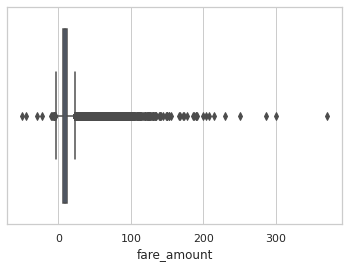

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["fare_amount"])

Lo que primero llama la atención es que en tarifa tenermos valores negativos, son descuentos?

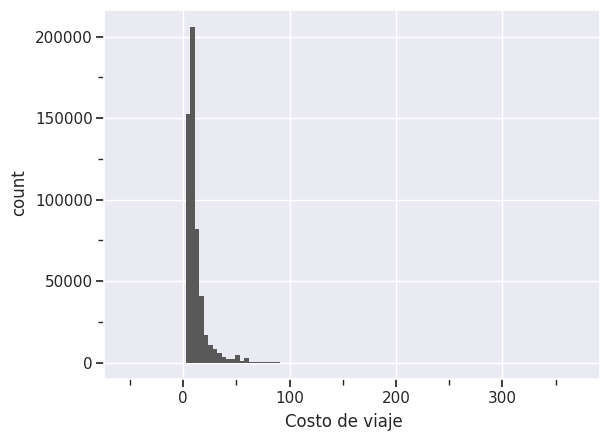

<ggplot: (8781986647534)>

In [13]:
(
    ggplot(df) 
    + geom_histogram(aes('fare_amount'), bins = 100)
    + theme_seaborn() 
    + labs(x = "Costo de viaje")
)

In [14]:
df_group = df.groupby(['passenger_count'])\
    .size()\
    .reset_index(name='n')

df_group

,passenger_count,n
0,0,1938
1,1,374471
2,2,79966
3,3,23733
4,4,11505
5,5,38152
6,6,11616


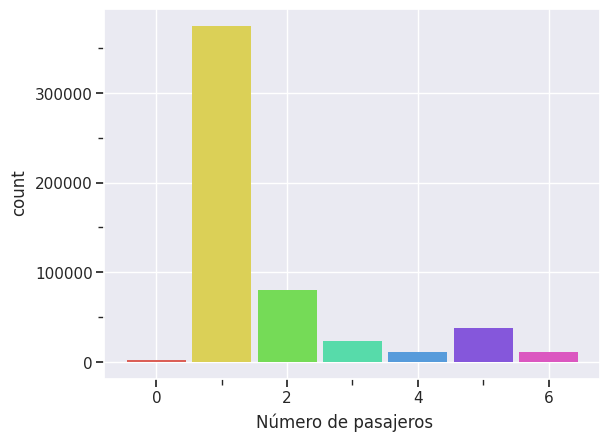

<ggplot: (8781984367613)>

In [15]:
(
    ggplot(df) 
    + geom_bar(
        aes(
            x='passenger_count',
            fill = df['passenger_count'].astype(str)
            ),
            show_legend = False
        )
    + theme_seaborn()
    + labs(x = "Número de pasajeros")
)

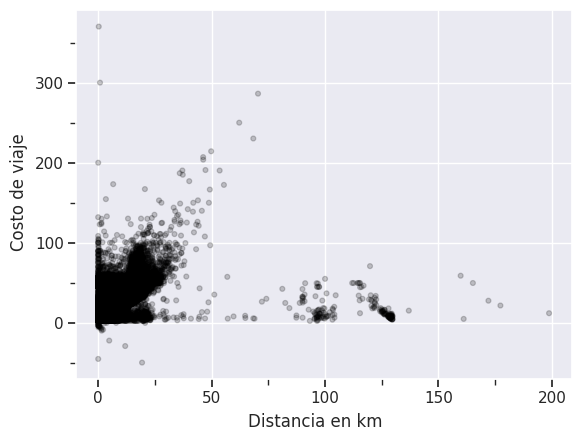

<ggplot: (8781984335086)>

In [16]:
(
    ggplot(df) 
    + geom_point(
        aes(x='dist_points_km', y='fare_amount'),
        alpha = .2,
        color = 'black')
    + theme_seaborn()
    + labs(x = 'Distancia en km', y = "Costo de viaje")
)
# Ya que las distancias no son realmente lineales, eso se ve reflejado en esta grafica

[Text(0.5, 30.5, 'Hora'),
 Text(66.5, 0.5, 'Día de la semana'),
 Text(0.5, 1.0, 'Promedio del costo de viaje')]

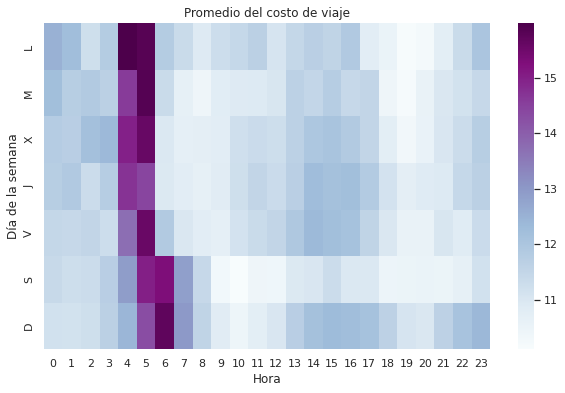

In [17]:
df_group = df.groupby(['pickup_day_week', 'pickup_hour'])['fare_amount']\
    .mean()\
    .reset_index()

df_pivot = pd.pivot_table(df_group, values='fare_amount', index=['pickup_day_week'],
                    columns=['pickup_hour'], fill_value=0)

y_axis_labels = ['L', 'M', 'X', 'J', 'V', 'S', 'D']

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.heatmap(df_pivot, cmap="BuPu", yticklabels=y_axis_labels)

ax.set(xlabel='Hora', ylabel='Día de la semana', title='Promedio del costo de viaje')

[Text(0.5, 30.5, 'Hora'),
 Text(66.5, 0.5, 'Día de la semana'),
 Text(0.5, 1.0, 'Conteo de viajes')]

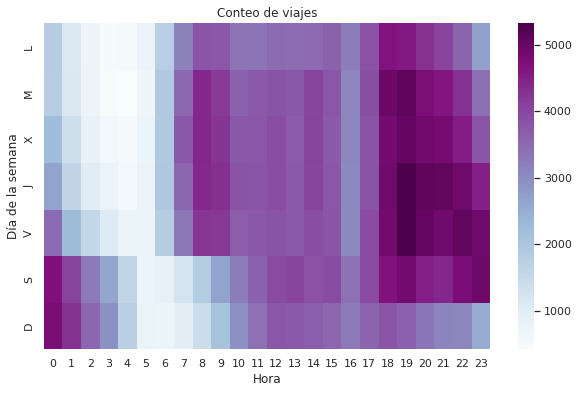

In [18]:
df_group = df.groupby(['pickup_day_week', 'pickup_hour'])['fare_amount']\
    .count()\
    .reset_index()

df_pivot = pd.pivot_table(df_group, values='fare_amount', index=['pickup_day_week'],
                    columns=['pickup_hour'], fill_value=0)

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.heatmap(df_pivot, cmap="BuPu", yticklabels=y_axis_labels)
ax.set(xlabel='Hora', ylabel='Día de la semana', title='Conteo de viajes')

In [19]:
from keplergl import KeplerGl

In [20]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.pickup_longitude, df.pickup_latitude))


In [21]:
# Save map_1 config to a file
#with open('hex_config.py', 'w') as f:
#   f.write('config = {}'.format(map_2.config))


In [22]:

# cargamos la configuración
%run config.py

In [23]:
%run config.py
map_view = KeplerGl(height=600, data={"data_1": gdf[1:10000]}, config = config)
map_view

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ohq60rq', 'type': …

In [24]:
#KeplerGl().save_to_html(file_name='index.html', data={"data_1": gdf[1:10000]}, config = config)